In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load
from metric_helpers import (bin_data, binned_positive_label_prob, apply_to_all, apply_to_merged_splits,
                            meta_confidence_and_accuracy, tpr_diff_and_accuracy)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
dataset = "propublica-recidivism"
sensitives = ["race"]
split_ids = [0, 1, 2]
algo_names = ["UGP_eq_opp_in_False", "UGP_eq_opp_in_True", "UGP_in_False", "UGP_in_True"]
propublica, results_propublica = load(dataset, sensitives, split_ids, algo_names)

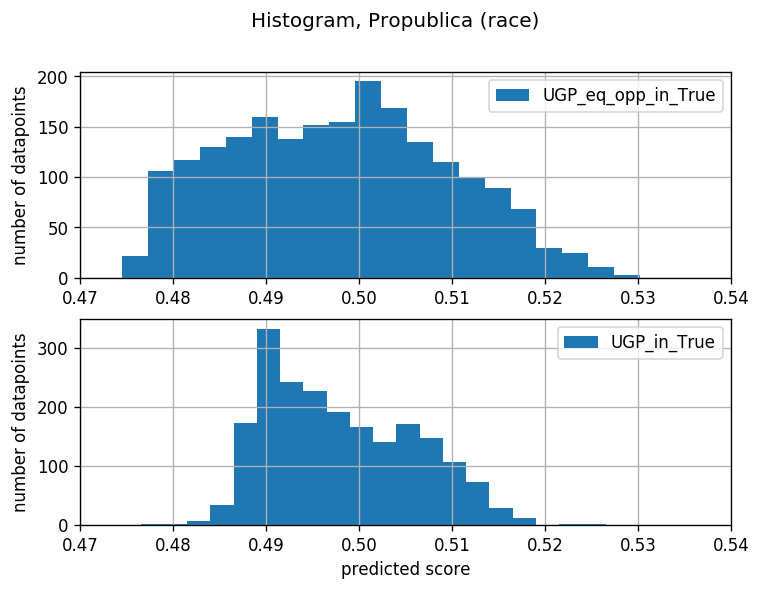

In [6]:
fig, plots = plt.subplots(2, 1, figsize=(7, 5), dpi=120)
#plot.plot(results_propublica['UGP_eq_opp_in_False']['race'][0]['pred_mean'], propublica['race'][0]['ytest'], 'o')
plots[0].hist(results_propublica['UGP_eq_opp_in_True']['race'][0]['pred_mean'], bins=20, label='UGP_eq_opp_in_True')
plots[1].hist(results_propublica['UGP_in_True']['race'][0]['pred_mean'], bins=20, label='UGP_in_True')
plots[1].set_xlabel('predicted score')
for plot in plots:
    plot.set_ylabel('number of datapoints')
    plot.set_xlim((.47, .54))
    plot.grid()
    plot.legend()
fig.suptitle('Histogram, Propublica (race)')
fig.savefig('histogram_propublica_race.svg')

In [7]:
conf_acc = apply_to_merged_splits(meta_confidence_and_accuracy(15), results_propublica, propublica)

In [8]:
conf_acc_s0 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=0), results_propublica, propublica)
conf_acc_s1 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=1), results_propublica, propublica)

In [9]:
confidence, accuracy = conf_acc['UGP_eq_opp_in_False']['race']
#scale = max(confidence.max() - 0.5, 0.5 - confidence.min())
#confidence = 0.5 * (confidence - 0.5) / scale + 0.5

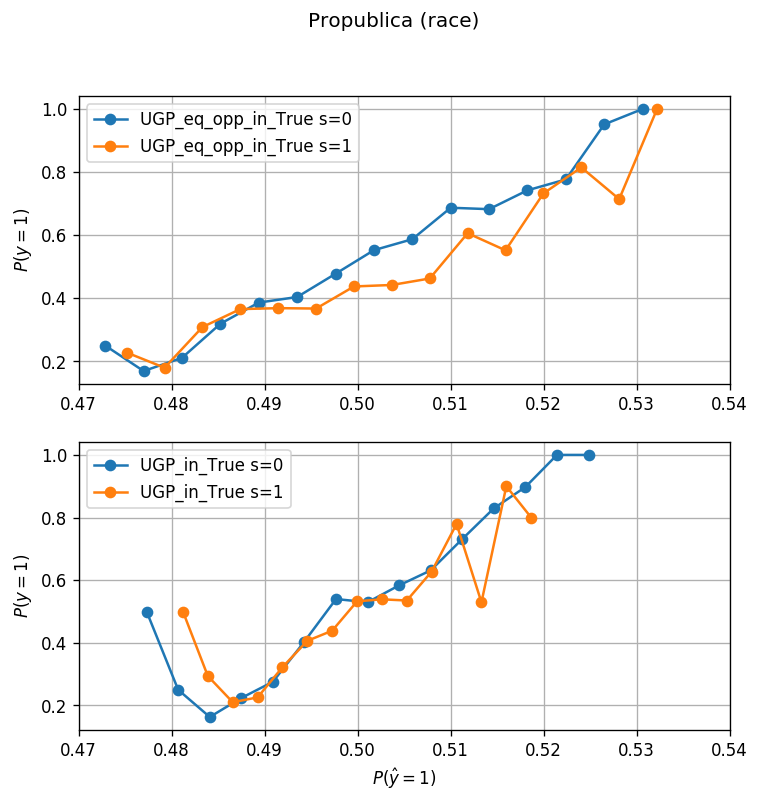

In [10]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['UGP_eq_opp_in_True']['race'], 'o-', label='UGP_eq_opp_in_True s=0')
plots[0].plot(*conf_acc_s1['UGP_eq_opp_in_True']['race'], 'o-', label='UGP_eq_opp_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['UGP_in_True']['race'], 'o-', label='UGP_in_True s=0')
plots[1].plot(*conf_acc_s1['UGP_in_True']['race'], 'o-', label='UGP_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Propublica (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    plot.set_xlim((.47, .54))
fig.savefig('confidence_propublica_race_by_s.svg')

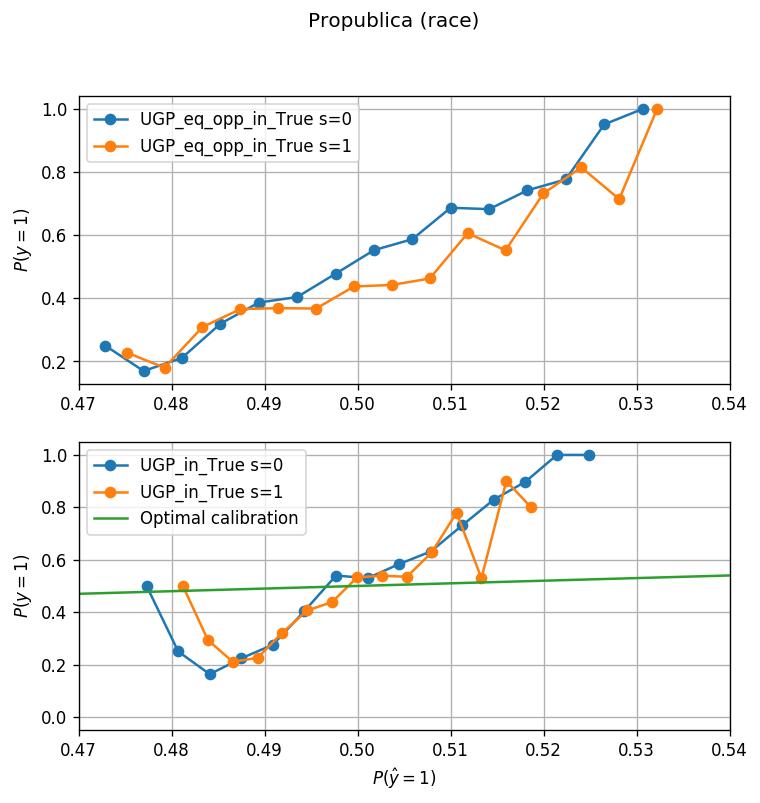

In [9]:
plot.plot([0, 1], [0, 1], label='Optimal calibration')
plot.legend()
fig.savefig('confidence_adult_with_optimal_scaled.svg')
fig

In [10]:
apply_to_all(tpr_diff_and_accuracy, results_propublica, propublica)

{'UGP_eq_opp_in_False': {'race': {0: (0.1183076262509496, 0.6310160427807486),
   1: (0.11456441082890201, 0.6324744773942635),
   2: (0.16035274300624242, 0.648031113271755)}},
 'UGP_eq_opp_in_True': {'race': {0: (0.07436337814182392, 0.6426835196888673),
   1: (0.09544098380508859, 0.6402527953330093),
   2: (0.05134810802479328, 0.6441419543023821)}},
 'UGP_in_False': {'race': {0: (0.15573427574286314, 0.6402527953330093),
   1: (0.11733879402406666, 0.6533787068546427),
   2: (0.18010921381466682, 0.6596985901798736)}},
 'UGP_in_True': {'race': {0: (0.15860223932357892, 0.6417112299465241),
   1: (0.1816175094406095, 0.6470588235294118),
   2: (0.2257489183208376, 0.6528925619834711)}}}